<a href="https://colab.research.google.com/github/princedalmet/Flask-deployment-project/blob/main/50_StartUps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
startups  = pd.read_csv("50_Startups.csv")
df = startups.copy()

In [ ]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.shape

(50, 5)

In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


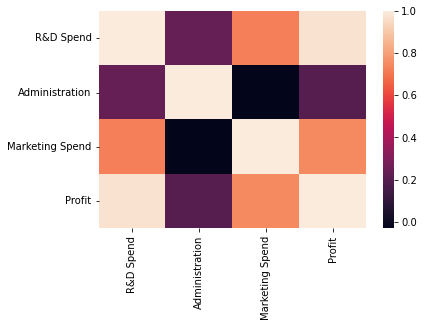

In [ ]:
sns.heatmap(df.corr());

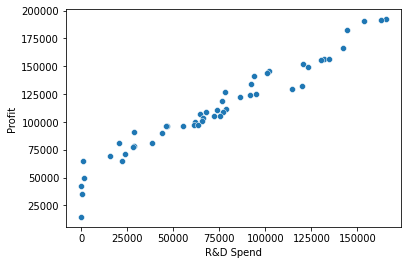

In [ ]:
sns.scatterplot(x = "R&D Spend", y = "Profit", data = df);

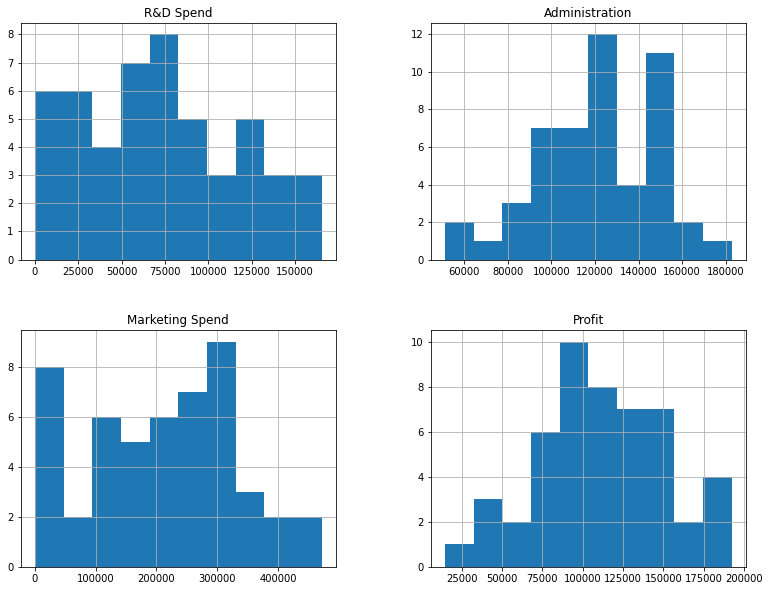

In [ ]:
df.hist(figsize =(13,10))
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [ ]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
df_State = pd.get_dummies(df["State"])

In [ ]:
df_State.head(5)


,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
df_State.columns = ['California','Florida','New York']

In [ ]:
df_State.head(5)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
df.drop(["State"], axis=1 , inplace =True)
df=pd.concat([df,df_State],axis=1)

In [ ]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
df.drop(["California"], axis=1, inplace = True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [ ]:
X = df.drop("Profit", axis = 1) 
y = df["Profit"] 

In [ ]:
X

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


In [ ]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train

,R&D Spend,Administration,Marketing Spend,Florida,New York
12,93863.75,127320.38,249839.44,1,0
4,142107.34,91391.77,366168.42,1,0
37,44069.95,51283.14,197029.42,0,0
8,120542.52,148718.95,311613.29,0,1
3,144372.41,118671.85,383199.62,0,1
6,134615.46,147198.87,127716.82,0,0
41,27892.92,84710.77,164470.71,1,0
46,1315.46,115816.21,297114.46,1,0
47,0.00,135426.92,0.00,0,0
15,114523.61,122616.84,261776.23,0,1


In [ ]:
X_test

,R&D Spend,Administration,Marketing Spend,Florida,New York
13,91992.39,135495.07,252664.93,0,0
39,38558.51,82982.09,174999.30,0,0
30,61994.48,115641.28,91131.24,1,0
45,1000.23,124153.04,1903.93,0,1
17,94657.16,145077.58,282574.31,0,1
48,542.05,51743.15,0.00,0,1
26,75328.87,144135.98,134050.07,1,0
25,64664.71,139553.16,137962.62,0,0
32,63408.86,129219.61,46085.25,0,0
19,86419.70,153514.11,0.00,0,1


In [ ]:
y_train

12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
6     156122.51
41     77798.83
46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
24    108552.04
34     96712.80
31     97483.56
0     192261.83
44     65200.33
27    105008.31
33     96778.92
5     156991.12
29    101004.64
11    144259.40
36     90708.19
1     191792.06
21    111313.02
2     191050.39
43     69758.98
35     96479.51
23    108733.99
40     78239.91
10    146121.95
22    110352.25
18    124266.90
49     14681.40
20    118474.03
7     155752.60
42     71498.49
14    132602.65
28    103282.38
38     81229.06
Name: Profit, dtype: float64

In [ ]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=lm.predict(X_test) 
y_pred

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

In [ ]:
import sklearn.metrics as metrics
import math

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(mae) 
print(mse) 
print(rmse) 

6961.477813252376
82010363.04430094
9055.957323458462


In [ ]:
print("R Squared=", lm.score(X_train, y_train))

R Squared= 0.9537019995248526


In [ ]:
import joblib
joblib.dump(lm, "multiple_regression_model.pkl")

['multiple_regression_model.pkl']

In [ ]:
import joblib
NewYork = 1
#California = 0
Florida = 0
RnD_Spend = 160349
Administration_Spend = 134321
Marketing_Spend = 401400
pred_args = [NewYork,Florida,RnD_Spend,Administration_Spend,Marketing_Spend]
pred_args_arr = np.array(pred_args)
pred_args_arr = pred_args_arr.reshape(1, -1)
mul_reg = open("multiple_regression_model.pkl","rb")
ml_model = joblib.load(mul_reg)
model_prediction = ml_model.predict(pred_args_arr)

round(float(model_prediction), 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


128963318.37